In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams

In [2]:
airpax_data = pd.read_csv("airline-passenger-traffic.csv",names=["Month","Passengers"])
airpax_data.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
airpax_data['Month'] = pd.to_datetime(airpax_data['Month'],format='%Y-%m') #convert from string to datetime
airpax_data = airpax_data.set_index(['Month'])

In [4]:
# airpax_data.dropna(inplace=True)
airpax_data = airpax_data.fillna(airpax_data.bfill())

In [5]:
airpax_data.isnull().sum()

Passengers    0
dtype: int64

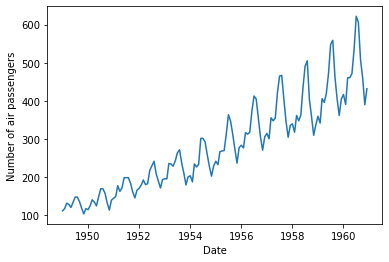

In [6]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(airpax_data)

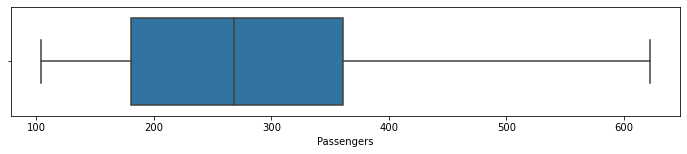

In [7]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=airpax_data['Passengers'],whis=1.5)

# Split time series data into training and test set

In [8]:
# train_len = 120
# train = airpax_data[0:train_len] # first 120 months as training set
# test = airpax_data[train_len:] # last 24 months as out-of-time test set

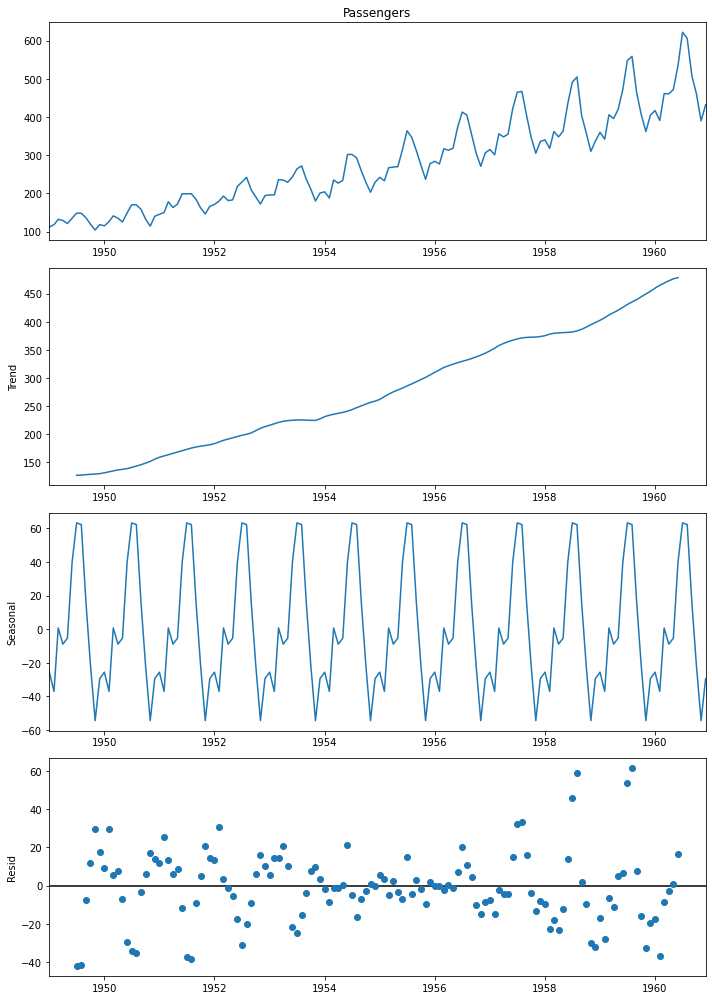

In [9]:
rcParams['figure.figsize'] = 10,14
decomposition = sm.tsa.seasonal_decompose(airpax_data.Passengers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

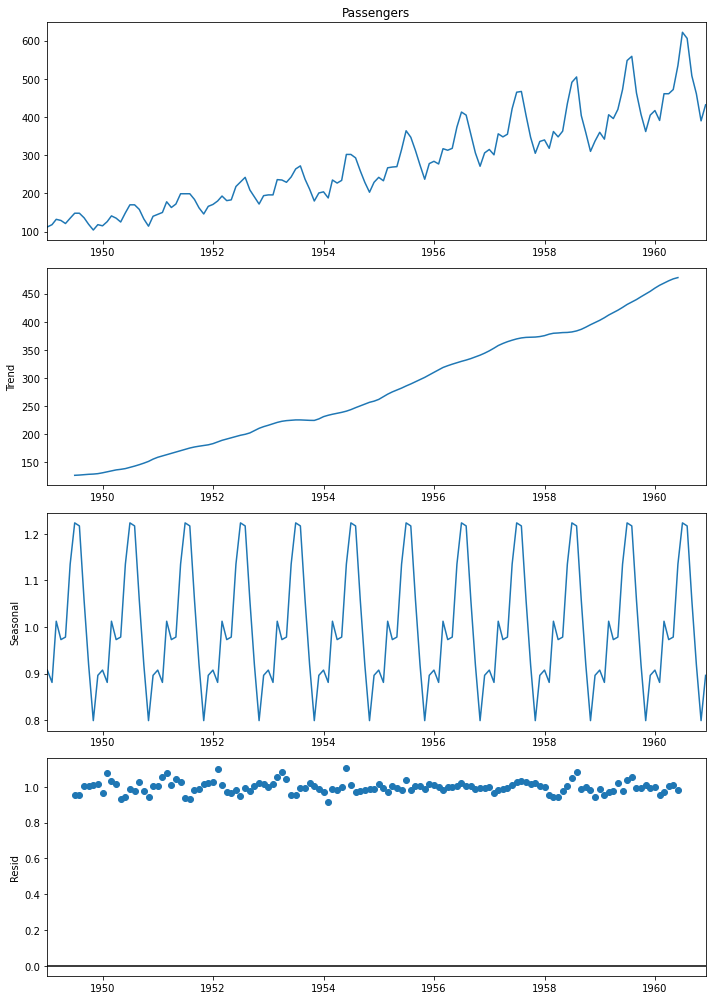

In [10]:
decomposition = sm.tsa.seasonal_decompose(airpax_data.Passengers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [11]:
train_len = 120
train = airpax_data[0:train_len] # first 120 months as training set
test = airpax_data[train_len:] # last 24 months as out-of-time test set

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [13]:
model = SimpleExpSmoothing(train['Passengers'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [14]:
model_fit = model.fit(smoothing_level=0.2,optimized=False)

In [15]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [16]:
y_pred = model_fit.forecast(24)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [17]:
y_pred

1959-01-01    374.897366
1959-02-01    374.897366
1959-03-01    374.897366
1959-04-01    374.897366
1959-05-01    374.897366
1959-06-01    374.897366
1959-07-01    374.897366
1959-08-01    374.897366
1959-09-01    374.897366
1959-10-01    374.897366
1959-11-01    374.897366
1959-12-01    374.897366
1960-01-01    374.897366
1960-02-01    374.897366
1960-03-01    374.897366
1960-04-01    374.897366
1960-05-01    374.897366
1960-06-01    374.897366
1960-07-01    374.897366
1960-08-01    374.897366
1960-09-01    374.897366
1960-10-01    374.897366
1960-11-01    374.897366
1960-12-01    374.897366
Freq: MS, dtype: float64

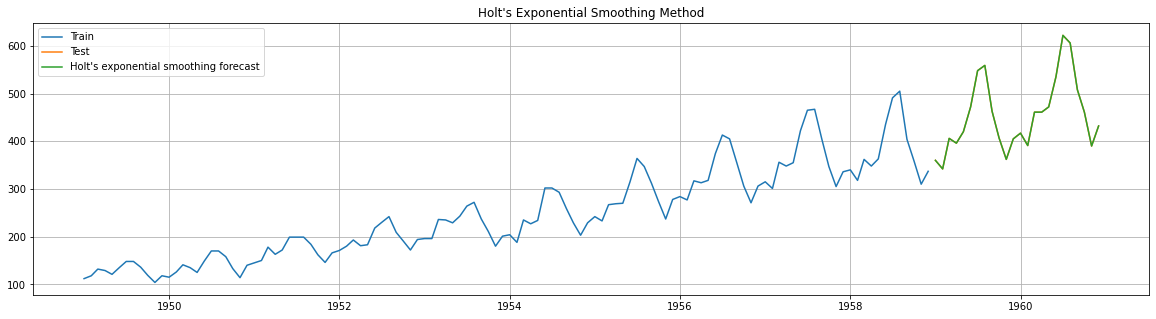

In [18]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(test['Passengers'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Passengers'], y_pred)).round(2)

rmse

108.57

In [20]:
mape = np.round(np.mean(np.abs(test['Passengers']-y_pred)/test['Passengers'])*100,2)

mape

16.77

In [21]:
model = ExponentialSmoothing(train['Passengers'],seasonal_periods=12,trend="multiplicative")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [22]:
# model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
model_fit = model.fit(optimized=True)

In [23]:
y_pred = model_fit.forecast(len(test))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [24]:
y_pred

1959-01-01    339.703908
1959-02-01    342.644862
1959-03-01    345.611277
1959-04-01    348.603374
1959-05-01    351.621374
1959-06-01    354.665502
1959-07-01    357.735985
1959-08-01    360.833050
1959-09-01    363.956927
1959-10-01    367.107850
1959-11-01    370.286051
1959-12-01    373.491767
1960-01-01    376.725236
1960-02-01    379.986698
1960-03-01    383.276397
1960-04-01    386.594575
1960-05-01    389.941481
1960-06-01    393.317362
1960-07-01    396.722469
1960-08-01    400.157056
1960-09-01    403.621377
1960-10-01    407.115690
1960-11-01    410.640255
1960-12-01    414.195334
Freq: MS, dtype: float64

# RMSE

In [25]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Passengers'], y_pred)).round(2)

rmse

104.18

# MAPE

In [26]:
mape = np.round(np.mean(np.abs(test['Passengers']-y_pred)/test['Passengers'])*100,2)

mape

16.1

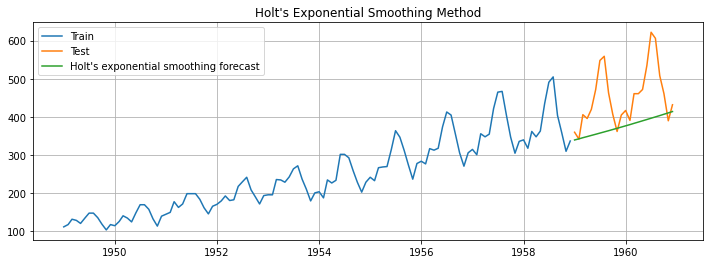

In [27]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_pred, label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

# Hot and winter

In [31]:
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='mul', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_pred = model_fit.forecast(24)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.9999999787891755, 'smoothing_trend': 6.797462491951235e-06, 'smoothing_seasonal': 1.9227069839184574e-08, 'damping_trend': nan, 'initial_level': 95.32913005452657, 'initial_trend': 1.0073997939923334, 'initial_seasons': array([1.16639813, 1.12351571, 1.29211168, 1.24891339, 1.25815785,
       1.47552799, 1.60570359, 1.59460418, 1.36454443, 1.18655768,
       1.03090045, 1.1486718 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


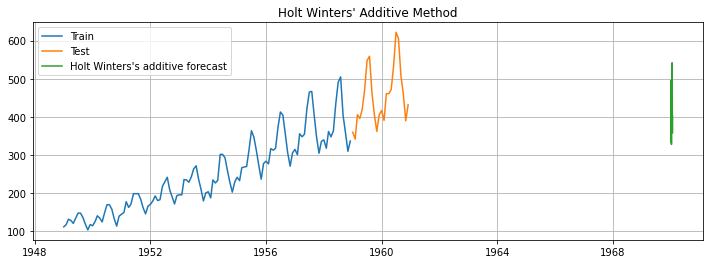

In [32]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_pred, label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [35]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_pred)).round(2)

rmse

41.54